# Data gathering - Twitter API

In [1]:
import tweepy
import jsonpickle
from collections import defaultdict
import json
import nltk 
import pandas as pd
import re
import string
import time
import numpy

from AppCred import CONSUMER_KEY, CONSUMER_SECRET #import userspecific keys to access twitter
from AppCred import ACCESS_TOKEN, ACCESS_TOKEN_SECRET #import userspecific keys to access twitter 

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth) # use the twitter api



In [ ]:
#progressives (PCC)
userlist = ['@BernieSanders', '@RepRaulGrijalva' , '@RepRubenGallego', '@RepHuffman', '@RepEBJ', '@RepLloydDoggett', '@PeterWelch', '@RepGwenMoore',
            '@RepDeSaulnier','@RepBarbaraLee', '@RoKhanna', '@RepZoeLofgren', '@RepDonBeyer', '@RepJayapal', '@RepAdamSmith', '@repmarkpocan',
            '@RepJimmyPanetta', '@RepJudyChu', '@BradSherman', '@gracenapolitano', '@tedlieu', '@RepJimmyGomez', '@RepKarenBass',
           '@RepLindaSanchez', '@RepMarkTakano', '@RepMaxineWaters', '@RepBarragan', '@RepKatiePorter', '@RepLowenthal', '@MikeLevin',
           '@RepJuanVargas', '@RepDianaDeGette', '@RepJoeNeguse', '@rosadelauro', '@RepLBR', '@RepDarrenSoto', '@RepLoisFrankel', '@EleanorNorton',
           '@RepWilson', '@RepHankJohnson', '@NikemaWilliams', '@kaikahele', '@RepMarieNewman', '@RepChuyGarcia', '@janschakowsky',
           '@RepAndreCarson', '@RepJohnYarmuth', '@chelliepingree', '@RepRaskin', '@RepMcGovern', '@RepLoriTrahan', '@RepKClark', '@RepDanKildee',
            '@AyannaPressley', '@RepDanKildee', '@RashidaTlaib', '@RepLawrence', '@IlhanMN', '@CoriBush', '@RepHorsford',
            '@DonaldNorcross', '@AndyKimNJ', '@FrankPallone', '@RepBonnie', '@TeresaForNM', '@RepGraceMeng', '@NydiaVelazquez', '@RepJeffries',
            '@RepYvetteClarke', '@RepJerryNadler', '@RepMaloney', '@RepEspaillat', '@AOC', '@RitchieTorres', '@JamaalBowmanNY', '@MondaireJones',
            '@RepJoeMorelle', '@RepAdams', '@RepBonamici', '@repblumenauer', '@RepPeterDeFazio', '@RepBrendanBoyle', '@RepDwightEvans',
            '@RepDean', '@RepMGS', '@RepCartwright', '@davidcicilline', '@RepCohen', '@RepEscobar', '@JacksonLeeTX18', '@RepSylviaGarcia']

In [ ]:
#Moderates (ND)
userlist = ['@SenatorCantwell', '@SenatorCarper', '@SenBobCasey', '@ChrisCoons', '@SenFeinstein', '@Maggie_Hassan', '@Hickenlooper', '@amyklobuchar',
            '@Sen_JoeManchin' , '@kyrstensinema', '@SenStabenow', '@SenatorTester', '@MarkWarner', '@RepPeteAguilar', '@RepColinAllred', '@RepBera',
            '@RepDonBeyer', '@RepLBR', '@Carolyn4GA7', '@RepBrendanBoyle', '@RepAnthonyBrown', '@RepBrownley', '@RepCheri', '@RepLoisCapps', 
            '@RepCarbajal', '@RepCardenas', '@RepAndreCarson', '@RepEdCase', '@SeanCasten', '@JoaquinCastrotx', '@GerryConnolly', '@repjimcooper',
            '@RepLouCorrea', '@RepJimCosta', '@RepJoeCourtney', '@RepAngieCraig', '@CharlieCrist', '@RepJasonCrow', '@RepCuellar', '@RepDavids', 
            '@RepDean', '@RepDelBene' , '@RepValDemings' , '@RepEscobar', '@RepFletcher', '@RepBillFoster', '@RepGonzalez', '@RepJoshG', '@GwenGraham', 
            '@RepJoshHarder', '@LtGovDennyHeck', '@jahimes', '@RepHorsford',  '@RepHoulahan', '@SaraJacobsCA', '@USRepKeating', '@RepDerekKilmer', '@RepRonKind', 
            '@Ann_Kirkpatrick', '@CongressmanRaja', '@RepAnnieKuster', '@RepRickLarsen', '@RepLawrence', '@RepAlLawsonJr', '@RepSusieLee', '@ElaineLuriaVA', 
            '@Malinowski', '@RepSeanMaloney', '@KathyManningNC', '@lucymcbath', '@RepMcEachin', '@RepGregoryMeeks', '@RepJoeMorelle', '@sethmoulton', '@PatrickMurphyFL', 
            '@RepStephMurphy', '@DonaldNorcross', '@RepOHalleran', '@RepJimmyPanetta', '@ChrisPappasNH', '@RepScottPeters', '@RepPerlmutter', '@RepDeanPhillips' , 
            '@pedropierluisi', '@RepMikeQuigley', '@RepKathleenRice', '@DeborahRossNC', '@RepRaulRuizMD', '@RepAdamSchiff', '@Schneider4IL10', '@RepSchrader', 
            '@repdavidscott', '@RepKimSchrier', '@RepDWStweets', '@RepTerriSewell', '@RepSherrill', '@RepSlotkin', '@RepAdamSmith', '@RepDarrenSoto', '@gregstantonaz', 
            '@RepHaleyStevens', '@RepStricklandWA', '@NormaJTorres', '@RepLoriTrahan', '@RepDavidTrone', '@RepJuanVargas', '@RepVeasey', '@RepFilemonVela', '@RepWexton', '@RepSusanWild' ]
len(userlist)

In [ ]:
user_collected = []  # the list of users whoms data we already have

In [ ]:
userlist_to_collect = [user for user in userlist if user not in user_collected]

In [ ]:
# with open('timelines.json', 'w') as f:
#     print('Scraping timelines of {} user(s)'.format(len(userlist)))
#     for user in userlist_to_collect: #
#         try:
#             tweetCount = 0
#             # Scraping status objects from the 'user' screen name
#             for status in tweepy.Cursor(api.user_timeline, 
#                                         screen_name=user, 
#                                         tweet_mode="extended" # to get the full text from a tweet.
#                                        ).items(): #Add an integeter in the items.() paranthesis if you want to specify the number of tweets collected: eg `items(100)´ for the 100 most recent tweets
#                 f.write(jsonpickle.encode(status._json, unpicklable=False) + '\n')
#                 tweetCount += 1
#             print('Done collecting {} tweets for user {}'.format(tweetCount, user))
#             user_collected.extend(user) # add the user to the list of user you have collected.
        
#         except: 
#             continue
#         time.sleep(200)
        
        
#     # you could add a section that checks if number of tweets you have collected is either 3200 or the number of tweets
#     # that the user has tweeted(from the metadata collected above).½bb

# Create df's

In [ ]:
import json
import pandas as pd

In [7]:
data_progressive = [json.loads(line) for line in open('timelines_prog.json', 'r')]
data_moderate = [json.loads(line) for line in open('timelines_mod.json', 'r')]

In [8]:
# User information:
names = []
screen_names = []
id_str = []
# Tweet information:
full_text = []
tweet_id = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
created_at = []


for i in data_progressive:
    
    # User information:
    names.append(i["user"]["name"])
    screen_names.append(i["user"]["screen_name"])
    id_str.append(i["user"]["id"])
    created_at.append(i["user"]["created_at"])
    
    # Tweet information:
    tweet_id.append(i["id"])
    full_text.append(i['full_text'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i.keys():
        is_retweet.append(True)
        tweet_txt.append(i["retweeted_status"]["full_text"])
        # append mentions and hashtags from original post (in order to get all)
        for mention in i["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    else:
        is_retweet.append(False)
        tweet_txt.append(i["full_text"])
        for mention in i["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "created_at": created_at,
    "tweet_id": tweet_id,
    "full_text": full_text,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags
}

df_progressive = pd.DataFrame(twitter_dictionary)

df_progressive.head()

,name,screen_name,id_str,created_at,tweet_id,full_text,is_retweet,tweet_txt,mentions,hashtags
0,Bernie Sanders,BernieSanders,216776631,Wed Nov 17 17:53:52 +0000 2010,1389974417875382278,Mitch McConnell fights every day for the needs...,False,Mitch McConnell fights every day for the needs...,[],[]
1,Bernie Sanders,BernieSanders,216776631,Wed Nov 17 17:53:52 +0000 2010,1389681990689968130,The debate now with the Republican Party is no...,False,The debate now with the Republican Party is no...,[],[]
2,Bernie Sanders,BernieSanders,216776631,Wed Nov 17 17:53:52 +0000 2010,1389648016722731010,Larry Krasner’s grassroots campaign in 2017 fo...,False,Larry Krasner’s grassroots campaign in 2017 fo...,[],[]
3,Bernie Sanders,BernieSanders,216776631,Wed Nov 17 17:53:52 +0000 2010,1389605738142523395,"To say that dental care, hearing aids, and eye...",False,"To say that dental care, hearing aids, and eye...",[],[]
4,Bernie Sanders,BernieSanders,216776631,Wed Nov 17 17:53:52 +0000 2010,1389336487829905409,You know what? At a time of massive income and...,False,You know what? At a time of massive income and...,[],[]


In [ ]:
# User information:
names = []
screen_names = []
id_str = []
# Tweet information:
full_text = []
tweet_id = []
tweet_txt = []
is_retweet = []
mentions = []
hashtags = []
created_at = []


for i in data_moderate:
    
    # User information:
    names.append(i["user"]["name"])
    screen_names.append(i["user"]["screen_name"])
    id_str.append(i["user"]["id"])
    created_at.append(i["user"]["created_at"])
    
    # Tweet information:
    tweet_id.append(i["id"])
    full_text.append(i['full_text'])
    
    # Creating tweet_txt, mentions and hashtags depending on whether it is a retweet or not
    m = []
    htags = []
    if "retweeted_status" in i.keys():
        is_retweet.append(True)
        tweet_txt.append(i["retweeted_status"]["full_text"])
        # append mentions and hashtags from original post (in order to get all)
        for mention in i["retweeted_status"]["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i["retweeted_status"]["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    else:
        is_retweet.append(False)
        tweet_txt.append(i["full_text"])
        for mention in i["entities"]["user_mentions"]:
            m.append(mention["screen_name"])
        for htag in i["entities"]["hashtags"]:
            htags.append(htag["text"])
            
    mentions.append(m)
    hashtags.append(htags)

twitter_dictionary = {
    "name": names,
    "screen_name": screen_names,
    "id_str": id_str,
    "created_at": created_at,
    "tweet_id": tweet_id,
    "full_text": full_text,
    "is_retweet": is_retweet,
    "tweet_txt": tweet_txt,
    "mentions" : mentions,
    "hashtags" : hashtags
}

df_moderate = pd.DataFrame(twitter_dictionary)

df_moderate.head()

# Preprocessing

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re
import string
import tweepy
import jsonpickle
from collections import defaultdict

import time
import numpy

In [13]:
def preprocess(text):
    
    #Lowercasing words
    text = text.lower()
    
    #Removing 'RT' and 'via'
    text = re.sub('(^rt|^via)((?:\\b\\W*@\\w+)+): ', '', text)
    
    #Removing mentions 
    text = re.sub(r'@\w+ ', '', text)             
    
    #Removing URLs
    text = re.sub(r'http\S+', '', text)
    
    #Removing numbers
    text = re.sub(r'[0-9.]','', text)
    
    #Removing separators and superfluous whitespace
    text = text.strip()
    text = re.sub(' +',' ',text)
    
    #Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #Lemmatizing
    tag_map = defaultdict(lambda : nltk.corpus.wordnet.NOUN)      #POS map
    tag_map['J'] = nltk.corpus.wordnet.ADJ
    tag_map['V'] = nltk.corpus.wordnet.VERB
    tag_map['R'] = nltk.corpus.wordnet.ADV    
    
    lemmatizer = nltk.WordNetLemmatizer()             #Creating lemmatizer.
    
    tokens = nltk.word_tokenize(text)                 #Tokenizing, as lemmatizer only takes tokenized sentences
    text_lemmatized = []                              #Empty list to save lemmatized sentence

    for word, tag in nltk.pos_tag(tokens):
        lemma = lemmatizer.lemmatize(word, tag_map[tag[0]])
        text_lemmatized.append(lemma)
    
    text = " ".join(text_lemmatized)
    
    #Removing stopwords
    stop_words_list = nltk.corpus.stopwords.words("english")
    text = " ".join([i for i in nltk.word_tokenize(text) if i not in stop_words_list])
    
    return text

In [15]:
df_progressive['tweets_preprocessed'] = df_progressive['full_text'].apply(lambda x: preprocess(x))
# df_progressive.head()

#save df
df_progressive.to_csv("df_progressive.csv")

In [ ]:
df_moderate['tweets_preprocessed'] = df_moderate['full_text'].apply(lambda x: preprocess(x))
df_moderate.head()

# save df
df_moderate.to_csv("df_moderate.csv")

# Import and merge preprocessed df's

In [2]:
df_moderate = pd.read_csv("df_moderate.csv")

In [16]:
df_progressive = pd.read_csv("df_progressive.csv")

In [17]:
print(len(df_moderate))
print(len(df_progressive))

322512
286668


In [22]:
#define democratic wing
df_moderate['democrate_wing'] = 'moderate'
df_progressive['democrate_wing'] = 'Progerssive'

In [23]:
#merge dataframes
df_all = pd.concat([df_moderate, df_progressive], ignore_index=True).reset_index(drop=True)
print(len(df_all))


609180


In [24]:
#drop duplicate tweets
df_all=df_all.drop_duplicates(subset=['tweet_id'])
print(len(df_all))


556211


In [25]:
#save df
df_all.to_csv("df_all.csv")

# Define climate dataframe 

In [2]:
from keyword_algorithm_update import *
%load_ext autoreload
%autoreload 2

In [3]:
df_all = pd.read_csv("df_all.csv")

In [4]:
df_all.head()

,Unnamed: 0,Unnamed: 0.1,name,screen_name,id_str,created_at,tweet_id,full_text,is_retweet,tweet_txt,mentions,hashtags,tweets_preprocessed,democrate_wing
0,0,0,Sen. Maria Cantwell,SenatorCantwell,117501995,Thu Feb 25 19:21:52 +0000 2010,1391471272236707840,Happy #MothersDay to all the moms who raise &a...,False,Happy #MothersDay to all the moms who raise &a...,[],['MothersDay'],happy mothersday mom raise amp inspire u ’ con...,moderate
1,1,1,Sen. Maria Cantwell,SenatorCantwell,117501995,Thu Feb 25 19:21:52 +0000 2010,1390779415810936835,Thank you to all teachers in Washington state ...,False,Thank you to all teachers in Washington state ...,[],['TeacherAppreciationWeek'],thank teacher washington state across nation w...,moderate
2,2,2,Sen. Maria Cantwell,SenatorCantwell,117501995,Thu Feb 25 19:21:52 +0000 2010,1390446025215668224,Happy #NationalNursesDay! Thank you to all nur...,False,Happy #NationalNursesDay! Thank you to all nur...,[],"['NationalNursesDay', 'NationalNursesWeek']",happy nationalnursesday thank nurse front line...,moderate
3,3,3,Sen. Maria Cantwell,SenatorCantwell,117501995,Thu Feb 25 19:21:52 +0000 2010,1390427540150538245,We cannot let Senate procedure stand in the wa...,False,We cannot let Senate procedure stand in the wa...,[],[],let senate procedure stand way important issue...,moderate
4,4,4,Sen. Maria Cantwell,SenatorCantwell,117501995,Thu Feb 25 19:21:52 +0000 2010,1390017301232197632,We must work with urgency to continue to impro...,False,We must work with urgency to continue to impro...,[],"['MMIP', 'MMIWG']",must work urgency continue improve reporting g...,moderate


In [5]:
#initial climate keywords from the immersion journal 
keyword_list= ['greennewdeal', 'gnd', 'environment', 'climate', 'climatecrisi', 'climatechang','earthday', 'actonclim', 'climateactionnow']
df_all['climate'] = np.where(df_all.full_text.str.contains('|'.join(keyword_list)),1,0)

#create reference and search set to algorithm
climate_ref = df_all[df_all['climate'] == 1]
climate_ref = climate_ref[['tweet_id', 'screen_name' , 'created_at', 'full_text', 'democrate_wing' ]].reset_index(drop=True) #reference set

climate_search = df_all[df_all['climate'] == 0]
climate_search=climate_search[['tweet_id', 'screen_name' , 'created_at', 'full_text', 'democrate_wing']].reset_index(drop=True) #search set

#transform to datetime
climate_ref['created_at']=pd.to_datetime(climate_ref['created_at'])
climate_search['created_at']=pd.to_datetime(climate_search['created_at'])

#define dype for text
climate_ref['full_text']=climate_ref['full_text'].astype(str)
climate_search['full_text']=climate_search['full_text'].astype(str)

#save as csv
climate_ref.to_csv("climate_ref.csv")
climate_search.to_csv("climate_search.csv")


In [6]:
print(len(climate_ref))
print(len(climate_search))

10525
545686


In [7]:
## Keywords from Table 3
climate = Keywords()
climate.ReferenceSet(data='climate_ref.csv', text_colname='full_text', id_colname='tweet_id')
climate.SearchSet(data='climate_search.csv', text_colname='full_text', id_colname='tweet_id')
climate.ProcessData(keep_twitter_symbols=False)

climate.ReferenceKeywords()
climate.ClassifyDocs(algorithms=['nbayes', 'logit'])
climate.FindTargetSet()
climate.FindKeywords()
climate.PrintKeywords()

Keyword object initialized.
Loaded reference set of size 10413 in 0.26 seconds.
Loaded search set of size 531310 in 10.66 seconds.
Time to process corpus: 546.25 seconds

18360 reference set keywords found.

Document Term Matrix: 541723 by 511878 with 8564005 nonzero elements

Time to get document-term matrix: 17.19 seconds

Ref training size: 3436; Search training size: 175332; Training size: 178768; Test size: 531310

Time for Naive Bayes: 0.61 seconds
Time for Logit: 11.89 seconds
1131 documents in target set
530179 documents in non-target set
1786 target set keywords found
20486 non-target set keywords found
   Reference                  Target                        Non-target
   ----------                 ----------                    ----------
1. climat                     climat                        famili
2. chang                      environment                   covid
3. environ                    chang                         women
4. amp                        climatech

In [8]:
climate.target_docnames

['1002355196792659968',
 '1002519980854870017',
 '1002649664771035136',
 '1004894529584066560',
 '1005453921610018816',
 '1014691804208300032',
 '1017054214223269888',
 '1017118358876147712',
 '1017411874206257158',
 '1020087315882958848',
 '1020323449770848261',
 '1021831989706481665',
 '1024713755773607936',
 '1026887847838511111',
 '1026996629432397824',
 '1030108001372438528',
 '1030473316493082624',
 '1032409843758505984',
 '1039564579968376832',
 '1040282271197143040',
 '1040338892589817861',
 '1043137517070024704',
 '1043227403152236544',
 '1044486975837822976',
 '1044622797132189698',
 '1047925738979176450',
 '1048797011263156225',
 '1049325047423422464',
 '1049425182450958341',
 '1049721537698418688',
 '1050060120011485185',
 '1051894773219581953',
 '1051980214723600384',
 '1055192454503124993',
 '1055235991294763008',
 '1059187954952953856',
 '1063319602409553920',
 '1064551056833724418',
 '1064600508613255176',
 '1064601451245244416',
 '1066378934395330560',
 '10670959772727

In [10]:
climate_search['full_text'][101755]

'Today is #UnitedNationsDay! Today we recognize @UN ’s 73 years of contributions to our global community. This year, I pledge to work with my colleagues to help build a more sustainable world by tackling #ClimateChange in Congress. https://t.co/aOQ9TfVsxE'

#### OBS: Added relevant search terms to QR to create reference set

Test the recall and prediction power of classifier

In [11]:
t=climate.target_docnames
len(t)

t_cum_recall = []
t_cum_precision = []
nt_cum_recall = []
nt_cum_precision = []
for i in range(1, 21):
    climate.ViewDocs(any_words = climate.target_keywords[0:i], doc_set='search', nprint=0)
    found = climate.viewed_docs
    t_cum_recall.append(len(set(found).intersection(set(t)))/len(t))
    t_cum_precision.append(len(set(found).intersection(set(t)))/len(found))
    climate.ViewDocs(any_words = climate.nontarget_keywords[0:i], doc_set='search', nprint=0)
    found = climate.viewed_docs
    nt_cum_recall.append(len(set(found).intersection(set(t)))/len(t))
    nt_cum_precision.append(len(set(found).intersection(set(t)))/len(found))



cum_recall = DataFrame(t_cum_recall + nt_cum_recall, columns=['Recall'])
cum_recall['Set'] = ['Target'] * 20 + ['Non-Target'] * 20
cum_recall['Word'] = list(range(1, 21)) * 2
cum_precision = DataFrame(t_cum_precision + nt_cum_precision, columns=['Precision'])
cum_precision['Set'] = ['Target'] * 20 + ['Non-Target'] * 20
cum_precision['Word'] = list(range(1, 21)) * 2

cum_recall.to_csv('cum_recall.csv', index=False)
cum_precision.to_csv('cum_precision.csv', index=False)


997 documents match keyword critera in the search set.

34384 documents match keyword critera in the search set.

1182 documents match keyword critera in the search set.

65722 documents match keyword critera in the search set.

8953 documents match keyword critera in the search set.

80428 documents match keyword critera in the search set.

9348 documents match keyword critera in the search set.

89740 documents match keyword critera in the search set.

9499 documents match keyword critera in the search set.

104811 documents match keyword critera in the search set.

9924 documents match keyword critera in the search set.

126489 documents match keyword critera in the search set.

10480 documents match keyword critera in the search set.

137417 documents match keyword critera in the search set.

11209 documents match keyword critera in the search set.

166964 documents match keyword critera in the search set.

13341 documents match keyword critera in the search set.

174699 documents

KeyboardInterrupt: 

In [14]:
cum_recall = DataFrame(t_cum_recall + nt_cum_recall, columns=['Recall'])
cum_recall['Set'] = ['Target'] * 17 + ['Non-Target'] * 17
cum_recall['Word'] = list(range(1, 18)) * 2
cum_precision = DataFrame(t_cum_precision + nt_cum_precision, columns=['Precision'])
cum_precision['Set'] = ['Target'] * 17 + ['Non-Target'] * 17
cum_precision['Word'] = list(range(1, 18)) * 2

cum_recall.to_csv('cum_recall.csv', index=False)
cum_precision.to_csv('cum_precision.csv', index=False)

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [28]:
Target = cum_recall[cum_recall['Set'] == 'Target']
Non_Target = cum_recall[cum_recall['Set'] == 'Non-Target']

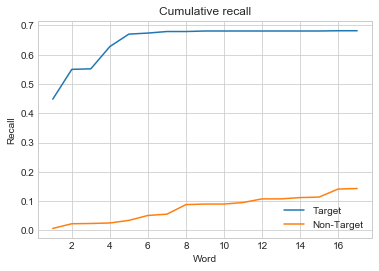

<Figure size 432x288 with 0 Axes>

In [29]:
x1 = Target.Recall
y1 = Target.Word
x2 = Non_Target.Recall
y2 = Non_Target.Word

plt.plot(y1, x1, label="Target")
plt.plot(y2, x2, label="Non-Target")
plt.title('Cumulative recall')
plt.xlabel("Word")
plt.ylabel("Recall")
plt.legend()
plt.show()
plt.savefig('cum_recall.png')

In [25]:
Target = cum_precision[cum_precision['Set'] == 'Target']
Non_Target = cum_precision[cum_precision['Set'] == 'Non-Target']

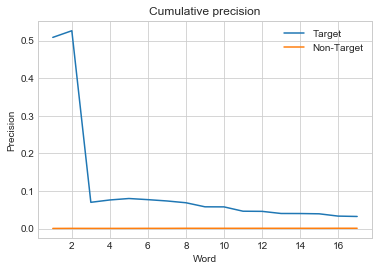

<Figure size 432x288 with 0 Axes>

In [27]:
x1 = Target.Precision
y1 = Target.Word
x2 = Non_Target.Precision
y2 = Non_Target.Word

plt.plot(y1, x1, label="Target")
plt.plot(y2, x2, label="Non-Target")
plt.title('Cumulative precision')
plt.xlabel("Word")
plt.ylabel("Precision")
plt.legend()
plt.show()
plt.savefig('cum_pewcision.png')

### Final climate dataset:

In [ ]:
climate_search.tweet_id=climate_search.tweet_id.astype(str)
climate_search['climate_target']= np.where(climate_search.tweet_id.str.contains('|'.join(climate.target_docnames)),1,0)

In [ ]:
df_climate_target = climate_search[climate_search['climate_target'] == 1]
len(df_climate_target)

In [ ]:
climate_ref['climate_target']=0
df_climate_final = pd.concat([df_climate_target, climate_ref], ignore_index=True).reset_index(drop=True)
len(df_climate_final)

In [ ]:
df_climate_final.to_csv("df_climate_final.csv")

# hSBM topic modelling

#### The following code is runned in CoLab, as HSBM is based on the Network Package graph-tool which is not possible to install on laptops. 

In [ ]:
# install dependencies
! pip install tensorflow_hub tensorflow_text

!pip install -q condacolab
import condacolab
condacolab.install()
 
import condacolab
#condacolab.check()
 
! conda config --add channels conda-forge
! conda config --add channels ostrokach-forge
! conda config --add channels pkgw-forge
 
! conda install gtk3 
! conda install pygobject graph-tool cairo
! conda install -c conda-forge graph-tool 
! git clone https://github.com/martingerlach/hSBM_Topicmodel.git
import graph_tool.all as gt
from hSBM_Topicmodel.sbmtm import sbmtm



In [ ]:
# access files in google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd

path2tox_climate_data = '/content/gdrive/My Drive/df_climate_final.csv' 
df_climate = pd.read_csv(path2tox_climate_data)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('TweetTokenizer')


import re
import string
import tweepy
from collections import defaultdict

import time
import numpy

from collections import Counter

In [ ]:
def preprocess(text):
    
    #Lowercasing words
    text = text.lower()
    
    #Removing 'RT' and 'via'
    text = re.sub('(^rt|^via)((?:\\b\\W*@\\w+)+): ', '', text)
    
    #Removing mentions 
    text = re.sub(r'@\w+ ', '', text)             
    
    #Removing URLs
    text = re.sub(r'http\S+', '', text)
    
    #Removing numbers
    text = re.sub(r'[0-9.]','', text)
    
    #Removing separators and superfluous whitespace
    text = text.strip()
    text = re.sub(' +',' ',text)
    
    #Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    #Lemmatizing
    tag_map = defaultdict(lambda : nltk.corpus.wordnet.NOUN)      #POS map
    tag_map['J'] = nltk.corpus.wordnet.ADJ
    tag_map['V'] = nltk.corpus.wordnet.VERB
    tag_map['R'] = nltk.corpus.wordnet.ADV    
    
    lemmatizer = nltk.WordNetLemmatizer()             #Creating lemmatizer.
    
    tokens = nltk.word_tokenize(text)                 #Tokenizing, as lemmatizer only takes tokenized sentences
    text_lemmatized = []                              #Empty list to save lemmatized sentence

    for word, tag in nltk.pos_tag(tokens):
        lemma = lemmatizer.lemmatize(word, tag_map[tag[0]])
        text_lemmatized.append(lemma)
    
    text = " ".join(text_lemmatized)
    
    #Removing stopwords
    stop_words_list = nltk.corpus.stopwords.words("english")
    text = " ".join([i for i in nltk.word_tokenize(text) if i not in stop_words_list])
    
    return text

In [ ]:

df_climate['doc'] = df_climate.full_text.apply(preprocess).values


In [ ]:
tokenizer = nltk.TweetTokenizer()

df_climate['tokens'] = df_climate['doc'].apply(lambda x: tokenizer.tokenize(x))

docs = df_climate['tokens']

In [ ]:
# remove infrequent words.

cutoff = 5
c = Counter()
for doc in docs:
    c.update(Counter(doc))
vocab = c.most_common(25000)
vocab = set([w for w,count in vocab if count>5])

# remove words
docs = [[w for w in doc if w in vocab] for doc in docs]


In [ ]:
model = sbmtm()
model.make_graph(docs,documents=['%d'%i for i in range(len(docs))])

In [ ]:
## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit()

In [ ]:
p_td_d,p_tw_w = model.group_membership(l=1)

In [ ]:
list1= list(p_td_d)

In [ ]:
climate = pd.concat([df_climate, test_transposed], axis=1)

In [ ]:
 topic_0 = climate[climate[0] == 1]['tokens']
 topic_1 = climate[climate[1] == 1]['tokens']
 topic_2 = climate[climate[2] == 1]['tokens']
 topic_3 = climate[climate[3] == 1]['tokens']
 topic_4 = climate[climate[4] == 1]['tokens']
 topic_5 = climate[climate[5] == 1]['tokens']
 topic_6 = climate[climate[6] == 1]['tokens']
 topic_7 = climate[climate[7] == 1]['tokens']
 topic_8 = climate[climate[8] == 1]['tokens']
 topic_9 = climate[climate[9] == 1]['tokens']
 topic_10 = climate[climate[10] == 1]['tokens']
 topic_11 = climate[climate[11] == 1]['tokens']
 topic_12 = climate[climate[12] == 1]['tokens']
 topic_13 = climate[climate[13] == 1]['tokens']
 topic_14 = climate[climate[14] == 1]['tokens']
 topic_15 = climate[climate[15] == 1]['tokens']
 topic_16 = climate[climate[16] == 1]['tokens']
 topic_17 = climate[climate[17] == 1]['tokens']
 topic_18 = climate[climate[18] == 1]['tokens']

In [ ]:
tokens_topic0 = []
for e in topic_0: 
  tokens_topic0.extend(e)

tokens_topic1 = []
for e in topic_1: 
  tokens_topic1.extend(e)

tokens_topic2 = []
for e in topic_2: 
  tokens_topic2.extend(e)

tokens_topic3 = []
for e in topic_3: 
  tokens_topic3.extend(e)

tokens_topic4 = []
for e in topic_4: 
  tokens_topic4.extend(e)

tokens_topic5 = []
for e in topic_5: 
  tokens_topic5.extend(e)

tokens_topic6 = []
for e in topic_6: 
  tokens_topic6.extend(e)

tokens_topic7 = []
for e in topic_7: 
  tokens_topic7.extend(e)

tokens_topic8 = []
for e in topic_8: 
  tokens_topic8.extend(e)

tokens_topic9 = []
for e in topic_9: 
  tokens_topic9.extend(e)

tokens_topic10 = []
for e in topic_10: 
  tokens_topic10.extend(e)

tokens_topic11 = []
for e in topic_11: 
  tokens_topic11.extend(e)

tokens_topic12 = []
for e in topic_12: 
  tokens_topic12.extend(e)

tokens_topic13 = []
for e in topic_13: 
  tokens_topic13.extend(e)

tokens_topic14 = []
for e in topic_14: 
  tokens_topic14.extend(e)

tokens_topic15 = []
for e in topic_15: 
  tokens_topic15.extend(e)  

tokens_topic16 = []
for e in topic_16: 
  tokens_topic16.extend(e)

tokens_topic17 = []
for e in topic_17: 
  tokens_topic17.extend(e)

tokens_topic18 = []
for e in topic_18: 
  tokens_topic18.extend(e)


In [ ]:
topic0_most_occur = Counter(tokens_topic0).most_common(20)
topic1_most_occur = Counter(tokens_topic1).most_common(20)
topic2_most_occur = Counter(tokens_topic2).most_common(20)
topic3_most_occur = Counter(tokens_topic3).most_common(20)
topic4_most_occur = Counter(tokens_topic4).most_common(20)
topic5_most_occur = Counter(tokens_topic5).most_common(20)
topic6_most_occur = Counter(tokens_topic6).most_common(20)
topic7_most_occur = Counter(tokens_topic7).most_common(20)
topic8_most_occur = Counter(tokens_topic8).most_common(20)
topic9_most_occur = Counter(tokens_topic9).most_common(20)
topic10_most_occur = Counter(tokens_topic10).most_common(20)
topic11_most_occur = Counter(tokens_topic11).most_common(20)
topic12_most_occur = Counter(tokens_topic12).most_common(20)
topic13_most_occur = Counter(tokens_topic13).most_common(20)
topic14_most_occur = Counter(tokens_topic14).most_common(20)
topic15_most_occur = Counter(tokens_topic15).most_common(20)
topic16_most_occur = Counter(tokens_topic16).most_common(20)
topic17_most_occur = Counter(tokens_topic17).most_common(20)
topic18_most_occur = Counter(tokens_topic18).most_common(20)

In [ ]:
print('0: ',topic0_most_occur,'\n')
print('1: ',topic1_most_occur,'\n')
print('2: ',topic2_most_occur,'\n')
print('3: ',topic3_most_occur,'\n')
print('4: ',topic4_most_occur,'\n')
print('5: ',topic5_most_occur,'\n')
print('6: ',topic6_most_occur,'\n')
print('7: ',topic7_most_occur,'\n')
print('8: ',topic8_most_occur,'\n')
print('9: ',topic9_most_occur,'\n')
print('10: ',topic10_most_occur,'\n')
print('11: ',topic11_most_occur,'\n')
print('12: ',topic12_most_occur,'\n')
print('13: ',topic13_most_occur,'\n')
print('14: ',topic14_most_occur,'\n')
print('15: ',topic15_most_occur,'\n')
print('16: ',topic16_most_occur,'\n')
print('17: ',topic17_most_occur,'\n')
print('18: ',topic18_most_occur,'\n')

In [ ]:
# look at  tweets content
topic_test = climate[climate[17] == 1]['full_text']


[sentence + '.' for sentence in topic_test]


### Topic distribution  for moderates and democrats

In [ ]:
moderates = climate[climate['democrate_wing'] == 'moderate']
mod_tweets= len(moderates)-moderates[11].sum()-moderates[18].sum()-moderates[15].sum()

mod_investments = (moderates[0].sum()+moderates[2].sum()) /mod_tweets*100
mod_legislation = (moderates[1].sum()) /mod_tweets*100
mod_trump = (moderates[3].sum()+moderates[7].sum()+moderates[8].sum())/mod_tweets*100
mod_health = (moderates[4].sum()) /mod_tweets*100
mod_extreme = (moderates[5].sum()) /mod_tweets*100
mod_urgency = (moderates[6].sum()+moderates[9].sum()) /mod_tweets*100
mod_local= (moderates[10].sum()+moderates[14].sum()) /mod_tweets*100
mod_list = (moderates[12].sum()) /mod_tweets*100
mod_injust = (moderates[13].sum()+moderates[17].sum()) /mod_tweets*100
mod_agriculture = (moderates[16].sum()) /mod_tweets*100

In [ ]:
progressives = climate[climate['democrate_wing'] == 'Progerssive']
prog_tweets= len(progressives)-progressives[11].sum()-progressives[18].sum()-progressives[15].sum()

prog_investments = (progressives[0].sum()+progressives[2].sum()) /prog_tweets*100
prog_legislation = (progressives[1].sum()) /prog_tweets*100
prog_trump = (progressives[3].sum()+progressives[7].sum()+progressives[8].sum())/prog_tweets*100
prog_health = (progressives[4].sum()) /prog_tweets*100
prog_extreme = (progressives[5].sum()) /prog_tweets*100
prog_urgency = (progressives[6].sum()+progressives[9].sum()) /prog_tweets*100
prog_local= (progressives[10].sum()+progressives[14].sum()) /prog_tweets*100
prog_list = (progressives[12].sum()) /prog_tweets*100
prog_injust = (progressives[13].sum()+progressives[17].sum()) /prog_tweets*100
prog_agriculture = (progressives[16].sum()) /prog_tweets*100


In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame([['Moderates', mod_investments, mod_legislation, mod_trump, mod_health, mod_extreme, mod_urgency, mod_local, mod_list, mod_injust, mod_agriculture],
                   ['Progressives', prog_investments, prog_legislation, prog_trump, prog_health, prog_extreme, prog_urgency, prog_local, prog_list, prog_injust, prog_agriculture]],
                   columns=['Democratic Wing', 'Investments', 'Legislation', 'Trump protest', 'Health', 'Extreme_weather', 'Urgency', 'Local_environment', 'Listings', 'Injustice', 'Agriculture'])



# Speech tagging

In [54]:
# Setup spacy
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download en_core_web_sm
import spacy
nlp_spacy = spacy.load("en_core_web_sm")
%time df_climate_final['nlp_spacy'] = df_climate_final.full_text.apply(nlp_spacy)

  Using cached setuptools-57.0.0-py3-none-any.whl (821 kB)
Requirement already up-to-date: wheel in c:\users\annem\anaconda3\lib\site-packages (0.36.2)
  Attempting uninstall: pip
    Found existing installation: pip 20.0.2
    Uninstalling pip-20.0.2:
      Successfully uninstalled pip-20.0.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Adgang nægtet: 'C:\\Users\\annem\\AppData\\Local\\Temp\\pip-uninstall-ao0112j3\\pip.exe'
Consider using the `--user` option or check the permissions.



  Created wheel for smart-open: filename=smart_open-3.0.0-py3-none-any.whl size=107097 sha256=82958977b7af1c6c43d1d69d66bc4961201bca47ed0c68f5212a36b3c041343f
  Stored in directory: c:\users\annem\appdata\local\pip\cache\wheels\83\a6\12\bf3c1a667bde4251be5b7a3368b2d604c9af2105b5c1cb1870
Successfully built smart-open
  Attempting uninstall: click
    Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 2.1.0
    Uninstalling smart-open-2.1.0:
      Successfully uninstalled smart-open-2.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 3.8.3 requires Cython==0.29.14, but you have cython 0.29.21 which is incompatible.


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-06-07 18:29:54.171543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-06-07 18:29:54.173835: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


NameError: name 'df_climate_both' is not defined

In [74]:
df_climate_final=pd.read_csv('df_climate_final.csv')

In [78]:
df_climate_final

,Unnamed: 0,tweet_id,screen_name,created_at,full_text,democrate_wing,climate_target
0,0,1382340286609821699,SenatorCarper,2011-02-09 19:46:42+00:00,My surface transportation infrastructure princ...,moderate,1
1,1,1337821676038447105,SenatorCarper,2011-02-09 19:46:42+00:00,"5 years ago, U.S. leadership pushed the histor...",moderate,1
2,2,1328463693139554310,SenatorCarper,2011-02-09 19:46:42+00:00,"In 1990, we lawmakers wanted to ensure the nex...",moderate,1
3,3,1305863398027132931,SenatorCarper,2011-02-09 19:46:42+00:00,RT @EPWDems: #ScienceKnows\n\n📈 by @ed_hawkins...,moderate,1
4,4,1235252594823569408,SenatorCarper,2011-02-09 19:46:42+00:00,"In less than a week, the public comment period...",moderate,1
...,...,...,...,...,...,...,...
11651,11651,1199415079831293959,JacksonLeeTX18,2009-10-07 16:13:13+00:00,of #climatechange &amp; need to address this A...,Progerssive,0
11652,11652,1176114521439690752,JacksonLeeTX18,2009-10-07 16:13:13+00:00,RT @girlsreallyrule: Here is 84 year-old anthr...,Progerssive,0
11653,11653,1294341158659915778,RepSylviaGarcia,2019-01-02 22:10:54+00:00,RT @ReadyHarris: Talking to kids about hurrica...,Progerssive,0
11654,11654,1267594524219580417,RepSylviaGarcia,2019-01-02 22:10:54+00:00,"For the start of #HurricaneSeason today, I int...",Progerssive,0


### Moderate speach

In [55]:
moderate_climate = df_climate_final[df_climate_final['democrate_wing'] == 'moderate']

In [56]:
%time moderate_climate['nlp_spacy'] = moderate_climate.full_text.apply(nlp_spacy)

Wall time: 1min 25s


In [57]:
#Extract examples (tokens) of all part of speech type. For each part of speech type, 
#count the number of occurences of each token and print them in descending order.
from collections import Counter
from collections import Counter
typ2common = {}
for doc in moderate_climate.nlp_spacy:
    for w in doc:
        typ = w.pos_
        if not typ in typ2common:
            typ2common[typ] = Counter()
        typ2common[typ][w.lemma_]+=1

In [58]:
for typ in sorted(typ2common,key=lambda x: sum(typ2common[x].values()),reverse=True):
  print(typ,typ2common[typ].most_common(20))

NOUN [('climate', 3940), ('change', 2481), ('amp', 1774), ('environment', 1535), ('community', 772), ('health', 750), ('crisis', 735), ('today', 681), ('#', 627), ('action', 581), ('economy', 552), ('energy', 494), ('job', 440), ('time', 423), ('year', 389), ('water', 364), ('planet', 362), ('bill', 356), ('threat', 352), ('generation', 345)]
VERB [('be', 1145), ('protect', 1020), ('have', 727), ('need', 617), ('work', 598), ('address', 551), ('fight', 539), ('take', 530), ('make', 520), ('continue', 458), ('do', 452), ('create', 429), ('help', 424), ('’', 372), ('join', 342), ('combat', 339), ('see', 308), ('ensure', 307), ('get', 300), ('lead', 296)]
PUNCT [('.', 10404), (',', 7718), (';', 1860), (':', 1638), ('-', 1307), ('!', 752), ('…', 645), ('"', 632), ('—', 297), ('–', 257), (')', 165), ('(', 148), ('?', 133), ("'", 77), ('...', 76), ('--', 62), ('#', 43), ('🌎', 28), ('*', 18), ('🔹', 16)]
ADP [('of', 4013), ('in', 3201), ('for', 2821), ('to', 2673), ('on', 2230), ('with', 1200)

### Progressive speach

In [79]:
progressive_climate = df_climate_final[df_climate_final['democrate_wing'] == 'Progerssive']

In [81]:
%time progressive_climate['nlp_spacy'] = progressive_climate.full_text.apply(nlp_spacy)

Wall time: 1min 4s


In [82]:
#Extract examples (tokens) of all part of speech type. For each part of speech type, 
#count the number of occurences of each token and print them in descending order.
from collections import Counter
from collections import Counter
typ2common = {}
for doc in progressive_climate.nlp_spacy:
    for w in doc:
        typ = w.pos_
        if not typ in typ2common:
            typ2common[typ] = Counter()
        typ2common[typ][w.lemma_]+=1

In [83]:
for typ in sorted(typ2common,key=lambda x: sum(typ2common[x].values()),reverse=True):
  print(typ,typ2common[typ].most_common(20))

NOUN [('climate', 3191), ('amp', 1495), ('change', 1470), ('environment', 972), ('crisis', 827), ('community', 752), ('#', 683), ('health', 574), ('action', 538), ('today', 495), ('justice', 435), ('time', 363), ('people', 351), ('year', 348), ('job', 328), ('energy', 323), ('planet', 302), ('water', 299), ('economy', 271), ('science', 257)]
VERB [('be', 965), ('protect', 717), ('have', 553), ('need', 553), ('fight', 452), ('work', 419), ('make', 406), ('’', 401), ('address', 373), ('take', 354), ('do', 314), ('continue', 295), ('help', 283), ('join', 279), ('create', 263), ('lead', 255), ('put', 214), ('see', 210), ('support', 193), ('get', 192)]
PUNCT [('.', 8876), (',', 6428), (':', 1563), (';', 1552), ('-', 860), ('!', 724), ('…', 700), ('"', 533), ('—', 293), ('?', 202), ('–', 136), ('(', 91), (')', 89), ("'", 65), ('*', 46), ('...', 44), ('--', 37), ('#', 31), ('🌎', 27), ('┗', 20)]
ADP [('of', 3403), ('in', 2463), ('for', 2272), ('to', 1861), ('on', 1777), ('with', 835), ('from',